# Resumo do pedido

Sua primeira tarefa é ajudar a empresa a otimizar suas despesas com marketing.

Você tem:

- Logs do servidor com dados sobre os acessos a Y.Afisha de janeiro de 2017 até dezembro de 2018

- Arquivo de despejo com todos os pedidos feitos durante o período

- Estatísticas de despesas com marketing

Você vai analisar:

- Como as pessoas usam o produto

- Quando elas começam a comprar

- Quanto dinheiro cada cliente traz para a empresa

- Quando as despesas serão cobertas

# 1.1 Carregando bibliotecas necessárias

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

# 1.2 Carregando dados fornecidos

In [2]:
visits_logs = pd.read_csv('/datasets/visits_log_us.csv')
orders_logs = pd.read_csv('/datasets/orders_log_us.csv')
costs_logs = pd.read_csv('/datasets/costs_us.csv')

# 2.1 Pré-processamento dos dados

# 2.2.1 Análises Iniciais

Primeiro, vamos checar as informações dos datasets fornecidos: checar os dados presentes, quais são os tipos de dados que temos, checar valores ausentes e duplicatas. 

Após essas checagens, vamos fazer as mudanças necessárias. 

Como temos 3 logs, faremos um por vez.

# 2.2.1.1 Analisando o dataframe 'visits_logs'

In [3]:
visits_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Checando valores ausentes e duplicatas:

In [4]:
visits_logs.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [5]:
visits_logs.duplicated().sum()

0

Vamos ver uma fatia do dataframe pra ver como ele está dividido:

In [6]:
visits_logs.head(20)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Resultados da primeira análise:

1) Os nomes de todas as colunas estão em maiúsculo. Não é adequado manter as colunas com título em maiúsculo, então vamos mudar todos pra letra minúscula. Além disso, as colunas com duas palavras possuem um ' ' entre elas. Vamos adicionar um '_'.

2) Com relação aos tipos de dados das colunas:
   - End Ts e Start Ts: são datas, então precisam ser convertidas pra um tipo datetime. 
    
3) Não encontramos valores ausentes nem duplicatas.

In [7]:
visits_logs = visits_logs.rename(columns = str.lower)
visits_logs = visits_logs.rename(columns={'start ts': 'start_ts', 'end ts': 'end_ts', 'source id': 'source_id'})
visits_logs.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [8]:
visits_logs['start_ts'] = pd.to_datetime(visits_logs['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits_logs['end_ts'] = pd.to_datetime(visits_logs['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Conclusão: corrigi os nomes das colunas mudando o formato para todas letras minúsculas e adicionando '_' nas colunas que possuiam ' '. Além disso, realizei a conversão das colunas de data para o tipo datetime.

# 2.2.1.2 Analisando o dataframe 'orders_logs'

In [9]:
orders_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Checando valores ausentes e duplicatas:

In [10]:
orders_logs.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [11]:
orders_logs.duplicated().sum()

0

Analisando uma fatia do df:

In [12]:
orders_logs.head(20)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Resultados da primeira análise:

1) Novamente os nomes de todas as colunas estão em maiúsculo e com ' '. Vamos adicionar um '_'.

2) Com relação aos tipos de dados das colunas:
   - Buy Ts: é uma data, então precisa ser convertidas pra um tipo datetime. 
    
3) Não encontramos valores ausentes nem duplicatas.

In [13]:
orders_logs = orders_logs.rename(columns = str.lower)
orders_logs = orders_logs.rename(columns={'buy ts': 'buy_ts'})
orders_logs.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [14]:
orders_logs['buy_ts'] = pd.to_datetime(orders_logs['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Conclusão: corrigi os nomes das colunas mudando o formato para todas letras minúsculas e adicionando '_' nas colunas que possuiam ' '. Além disso, realizei a conversão da coluna de data para o tipo datetime.

# 2.2.1.3 Analisando o dataframe 'costs_logs'

In [15]:
costs_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Checando valores ausentes e duplicatas:

In [16]:
costs_logs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [17]:
costs_logs.duplicated().sum()

0

Analisando uma fatia do df:

In [18]:
costs_logs.head(20)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Resultados da primeira análise:

1) Dessa vez os nomes das colunas estão todos adequados

2) Com relação aos tipos de dados das colunas:
   - dt: é uma data, então precisa ser convertidas pra um tipo datetime. 
    
3) Não encontramos valores ausentes nem duplicatas.

In [19]:
costs_logs['dt'] = pd.to_datetime(costs_logs['dt'], format='%Y-%m-%d %H:%M:%S')
costs_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Conclusão: modifiquei o tipo de dado da coluna dt para datetime.

# 3.1 Analisando produtos, vendas e marketing

# 3.1.1 Analisando os visitantes

# 3.1.1.1 Quantidade de Acessos, DAU/WAU/MAU e Taxa de Retenção

Recapitulando, temos os dataframes de 3 logs:

    - Visitantes (visits_logs): que mostra o acesso e tempo de permanência de cada usuário, além do anúncio que direcionou o usuário pro site
    - Orders (orders_logs): mostra a data e o horário dos pedidos dos clientes e a receita de cada pedido
    - Custos (costs_logs): mostra o custo que tivemos com cada tipo de anúnio em cada dia

Primeiramente, vou encontrar a quantidade de acessos. Como uma mesma pessoa pode acessar mais de uma vez no dia, vou primeiro fazer uma checagem diária, semanal e mensal de usuários únicos, e depois farei uma checagem sem distinção mas somente para os dias.

In [20]:
dau = visits_logs.groupby(visits_logs['start_ts'].dt.date)['uid'].nunique()
wau = visits_logs.groupby(visits_logs['start_ts'].dt.to_period('W'))['uid'].nunique()
mau = visits_logs.groupby(visits_logs['start_ts'].dt.to_period('M'))['uid'].nunique()
daily_users = visits_logs.groupby(visits_logs['start_ts'].dt.date)['uid'].count()


print(f'A média de acessos únicos diários é: {dau.mean()}')
print(f'A média de acessos únicos semanais é: {wau.mean()}')
print(f'A média de acessos únicos mensais é: {mau.mean()}')
print(f'A média de acessos diários é: {daily_users.mean()}')


A média de acessos únicos diários é: 907.9917582417582
A média de acessos únicos semanais é: 5716.245283018868
A média de acessos únicos mensais é: 23228.416666666668
A média de acessos diários é: 987.3626373626373


Considerando somente acessos unívocos, a média de acessos não é constante por dia. Se fosse, a média mensal teria que ser próxima de 908 * 30 (acessos diários * dias do mês). 
Porém, considerando os acessos diários não-unívocos vemos que existe uma reincidência dos mesmos IDs em um mesmo dia, mostrando que os usuários podem acessar várias vezes em um dia só.

Esses valores são as métricas DAU, WAU e MAU (Daily/Weekly/Monthly Active User). A partir delas vamos encontrar as taxas de retenção.

In [21]:
week_retention_rate = dau.mean()/wau.mean()*100
month_retention_rate = dau.mean()/mau.mean()*100
print(week_retention_rate)
print(month_retention_rate)

15.88440861589881
3.908969652437603


A taxa de retenção de clientes unívocos é semanal é de 15%, enquanto a mensal é de quase 4%. Não é muito alta, então é algo que podemos ficar atentos e que pode ser melhorada.

# 3.1.1.2 Duração do Acesso (ASL)

Vou descobrir quanto tempo os visitantes passam dentro do produto e vamos visualizar com um gráfico:

In [22]:
visits_logs['session_duration_secs'] = (visits_logs['end_ts'] - visits_logs['start_ts']).dt.seconds

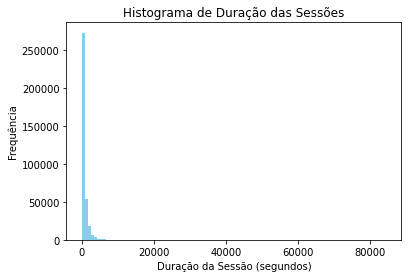

In [23]:
plt.hist(visits_logs['session_duration_secs'], bins=100, color='skyblue')
plt.xlabel('Duração da Sessão (segundos)')
plt.ylabel('Frequência')
plt.title('Histograma de Duração das Sessões')
plt.show()

A distribuição não segue uma distribuição normal, então não podemos utilizar a média pra encontrar um valor padronizado pra duração de cada sessão. Nesse caso então usaremos a moda.

In [24]:
asl = visits_logs['session_duration_secs'].mode()
print(asl)

0    60
dtype: int64


Então grande parte dos usuários passam 60 segundos no produto!

# 3.1.1.3 Retorno dos Usuários

Vamos encontrar agora a frequência de retorno dos usuários.

In [25]:
repeated = visits_logs['uid'][visits_logs['uid'].duplicated(keep=False)]
repeated_uids = visits_logs[visits_logs['uid'].isin(repeated)]
print((repeated_uids['uid'].value_counts()).value_counts().sort_index())

2      30926
3      10184
4       4357
5       2283
6       1243
       ...  
343        1
357        1
551        1
615        1
893        1
Name: uid, Length: 144, dtype: int64


Essas são quantas vezes os usuários retornaram. Existem usuários que voltaram muitas vezes, mas 80% dos usuários voltaram uma ou duas vezes. 

Pra encontrar então a frequência de retorno, é mais vantajoso investigarmos o tempo que levou para cada uid retornar entre o primeiro e o segundo acesso, e entre o segundo e o terceiro acesso.

In [26]:
first_access = repeated_uids.groupby('uid')['start_ts'].min()
second_access = repeated_uids.groupby('uid')['start_ts'].nth(1)
third_access = repeated_uids.groupby('uid')['start_ts'].nth(2)
print((second_access - first_access).mean())
print((third_access - second_access).mean())


35 days 04:37:39.656998158
0 days 13:06:33.053485520


O intervalo de tempo entre o primeiro acesso e o segundo é, em média, de 35 dias. 
Enquanto isso, a média de acesso entre o segundo acesso e o terceiro é de apenas horas. Isso pode apontar alguma anomalia no produto.  

# 3.1.2 Analisando os pedidos

# 3.1.2.1 Tempo de Conversão

Vamos ter uma visão novamente dos logs de pedidos

In [27]:
orders_logs.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Tenho certeza que todos uid presentes na tabela de orders_logs estão presente na tabela visits_logs. Ninguém pode realizar o pedido sem antes realizar o acesso. Para essa análise vamos remover os acessos duplicados. É importante focar na primeira venda  e depois analisamos os retornos.

In [28]:
orders_logs_unique = orders_logs.drop_duplicates(subset='uid')
visits_logs_unique = visits_logs.drop_duplicates(subset='uid')

correlated_logs = orders_logs_unique.merge(visits_logs_unique, on='uid', how='left')
correlated_logs

,buy_ts,revenue,uid,device,end_ts,source_id,start_ts,session_duration_secs
0,2017-06-01 00:10:00,17.00,10329302124590727494,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,120
1,2017-06-01 00:25:00,0.55,11627257723692907447,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,540
3,2017-06-01 00:29:00,0.55,16109239769442553005,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,1140
4,2017-06-01 07:58:00,0.37,14200605875248379450,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,1680
...,...,...,...,...,...,...,...,...
36518,2018-05-31 23:50:00,4.64,12296626599487328624,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,1620
36519,2018-05-31 23:50:00,5.80,11369640365507475976,desktop,2018-05-31 23:55:00,10,2018-05-31 23:05:00,3000
36520,2018-05-31 23:54:00,0.30,1786462140797698849,desktop,2018-05-31 23:55:00,3,2018-05-31 23:52:00,180
36521,2018-05-31 23:56:00,3.67,3993697860786194247,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,480


Perdemos cerca de 30% de vendas (50415 - 36523). Um valor relevante, mas vamos focar na primeira compra no momento.

In [29]:
correlated_logs['time_between_access_and_purchase'] = (correlated_logs['buy_ts'] - correlated_logs['start_ts']).dt.total_seconds()

conditions = [(correlated_logs['time_between_access_and_purchase'] <= 3600),  
    ((correlated_logs['time_between_access_and_purchase'] > 3600) & (correlated_logs['time_between_access_and_purchase'] <= 86400)),  
    ((correlated_logs['time_between_access_and_purchase'] > 86400) & (correlated_logs['time_between_access_and_purchase'] <= 172800)), 
    ((correlated_logs['time_between_access_and_purchase'] > 172800) & (correlated_logs['time_between_access_and_purchase'] <= 604800)),  
    (correlated_logs['time_between_access_and_purchase'] > 604800)]
              
values = ['1h', '0d', '1d', '1w', 'more than 1 week']

correlated_logs['buy_category'] = np.select(conditions, values, 'outro')
correlated_logs['buy_category'].value_counts()

1h                  28026
more than 1 week     4021
0d                   2700
1w                   1137
1d                    639
Name: buy_category, dtype: int64

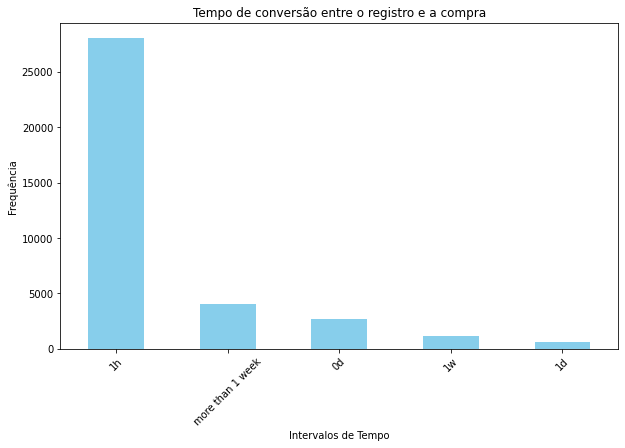

In [30]:
category_counts = correlated_logs['buy_category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Tempo de conversão entre o registro e a compra')
plt.xlabel('Intervalos de Tempo')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


Então a grande maioria das pessoas finalizam a compra na primeira hora que acessam o serviço (28026). Lembrando que esse é o valor para o primeiro acesso. 

Com isso encontramos também quantos pedidos são realizados por coorte.

# 3.1.2.2 Volume médio de compras

Podemos basear os valores de receita da média de compras para as compras unívocas ou para o montante total.

Para usuários unívocos, temos:

In [31]:
print(correlated_logs['revenue'].mean())

4.140423021109986


E para usuários que realizaram mais de uma compra:

In [32]:
print(orders_logs['revenue'].mean())

4.999646930477041


Ou seja, a fatia de usuários que repetem a compra é significativa, pois aumenta o valor médio de cada compra. Então esses usuários constantes apresentam uma fatia importante do negócio.

# 3.1.2.3 Receita dos clientes (LTV)

Os clientes que repetem compras impactam positivamente nossas finanças. Vamos encontrar quanto foi a receita de cada um desses clientes individualmente e comparar a soma dos clientes que fizeram uma única compra com os clientes que compram constantemente.

Irei calcular o LTV, que é o lucro bruto dividido pelo número de clientes no período.

In [33]:
repeated_uids = orders_logs['uid'][orders_logs['uid'].duplicated(keep=False)].unique()
repeated_orders = orders_logs[orders_logs['uid'].isin(repeated_uids)]
revenue_per_customer = repeated_orders.groupby('uid')['revenue'].sum().reset_index()
revenue_per_customer

,uid,revenue
0,1575281904278712,3.05
1,2551852515556206,10.99
2,3605148382144603,0.69
3,9757981411973753,8.80
4,12695041396440380,14.66
...,...,...
6287,18433282115640022096,33.85
6288,18433518600992672269,10.25
6289,18433668464649487724,2.44
6290,18437195840292658200,2.94


In [34]:
revenue_per_customer['revenue'].mean()

20.879561347743167

A média de receita dos clientes (Lifetime value) que repetem as compras é de 20$. Isso é muito maior do que a média geral considerando os clientes que compram somente uma vez. 

Vamos verificar se na totalidade a soma das vendas dos clientes que realizaram somente uma compra é maior do que os clientes que repetiram compras.

In [35]:
revenue_per_customer['revenue'].sum()


131374.2

In [36]:
correlated_logs['revenue'].sum()

151220.67

Por muito pouco a soma total da receita dos clientes que compraram somente uma vez é maior. 
Mas lembrando, os clientes repetidos representavam 30% dos dados originais. 
Isso mostra que esses clientes que representam 30% de todos clientes representam quase o mesmo do que todos os outros que fizeram somente uma compra juntos (70%).

Desse modo, podemos garantir aqui que uma estratégia de retenção de clientes é muito lucrativa. Quanto mais clientes convertermos a repetirem compras, maior será a receita.

# 3.1.3 Analisando os custos

Vamos agora analisar os custos com marketing. Vamos encontrar quais foram os anúncios mais rentáveis e encontrar pontos de melhoria.

# 3.1.3.1 Somando os gastos totais, por anúncio e ao longo do tempo

Vamos analisar os gastos totais, pra cada tipo de anúncio e ao longo do tempo por mês.

In [37]:
total_cost = costs_logs['costs'].sum()

source_costs = costs_logs.groupby('source_id')['costs'].sum().reset_index()

costs_logs['month'] = costs_logs['dt'].dt.to_period('M').dt.to_timestamp()
costs_by_month = costs_logs.groupby('month')['costs'].sum().reset_index()


print(total_cost)
print(source_costs)
print(costs_by_month)

329131.62
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49
        month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27


<Figure size 720x432 with 0 Axes>

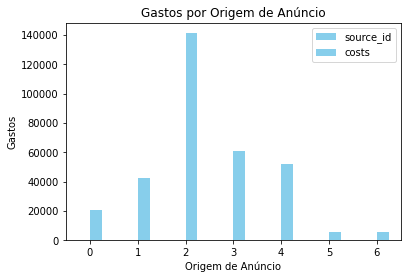

In [38]:
plt.figure(figsize=(10, 6))
source_costs.plot(kind='bar', color='skyblue')
plt.title('Gastos por Origem de Anúncio')
plt.xlabel('Origem de Anúncio')
plt.ylabel('Gastos')
plt.xticks(rotation=0) 
plt.show()

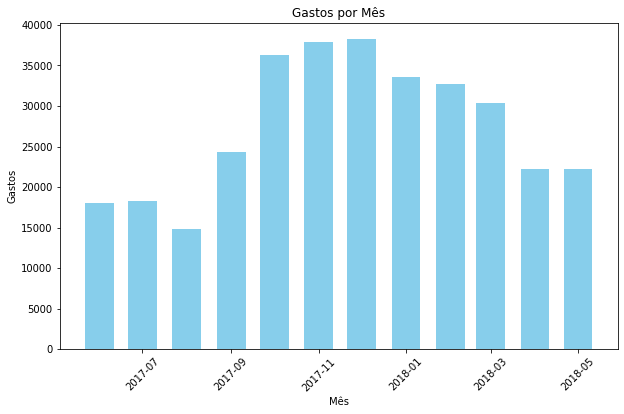

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(costs_by_month['month'], costs_by_month['costs'], color='skyblue', width = 20)
plt.title('Gastos por Mês')
plt.xlabel('Mês')
plt.ylabel('Gastos')
plt.xticks(rotation=45)
plt.show()


Visualizamos que o anúncio 2 foi o que custou mais caro por muito. 
Com relação aos meses, conseguimos identificar sazonalidade no período de fim de ano, tendo um aumento de gastos com anúncios no período entre outubro e dezembro.
Vamos correlacionar o anúncio 2 com os meses pra encontrar quando teve mais gastos com esse anúncio.

/tmp/ipykernel_247/3863668103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  costs_source_2['dt'] = costs_source_2['dt'].dt.to_period('M').dt.to_timestamp()


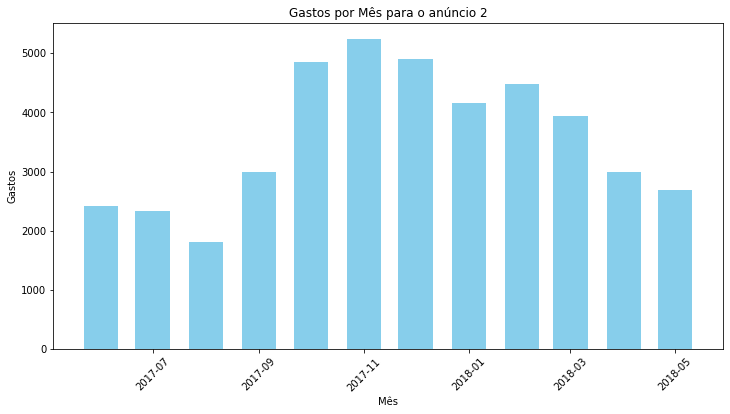

In [40]:
costs_source_2 = costs_logs[costs_logs['source_id'] == 2]
costs_source_2['dt'] = costs_source_2['dt'].dt.to_period('M').dt.to_timestamp()
costs_by_month_source_2 = costs_source_2.groupby('dt')['costs'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(costs_by_month_source_2['dt'], costs_by_month_source_2['costs'], color='skyblue', width = 20)
plt.title('Gastos por Mês para o anúncio 2')
plt.xlabel('Mês')
plt.ylabel('Gastos')
plt.xticks(rotation=45)
plt.show()

Os gastos com o anúncio 2 acompanham o efeito de sazonalidade, mas os gastos não somam o mesmo tanto. Ou seja, o anúncio 2 ter custado mais não necessariamente tem a ver com o período de fim de ano.

# 3.1.3.2 Custos da aquisição de clientes para cada origem (CAC)

Para calcular o CAC precisamos calcular a razão dos custos de marketing e da quantidade de clientes novos que vieram de cada fonte de marketing pra cada mês.


In [41]:
costs_logs['quarter'] = costs_logs['dt'].dt.to_period('Q-MAY')
source_costs = pd.pivot_table(costs_logs,
    values='costs',
    index='source_id',
    columns='quarter',
    aggfunc='sum')
source_costs = source_costs.fillna(0)
source_costs

quarter,2018Q1,2018Q2,2018Q3,2018Q4
source_id,,,,
1,3150.30,6262.92,6731.86,4688.19
2,6571.54,13078.34,13529.88,9626.28
3,21549.56,42726.13,45256.86,31789.08
4,10261.89,17001.92,19225.22,14584.57
5,7799.54,15941.88,16315.35,11700.33
9,836.69,1708.21,1756.64,1215.95
10,876.61,1880.27,1741.09,1324.52


Aqui temos os custos de 4 trimestres de jun/2017 a maio/2018. Os nomes estão representados como quartis de 2018 pois o ano fiscal termina em 2018, mas os Q1 e Q2 são referentes a 2017, e Dezembro/2017 está incluso no Q3 com Janeiro e Fevereiro.

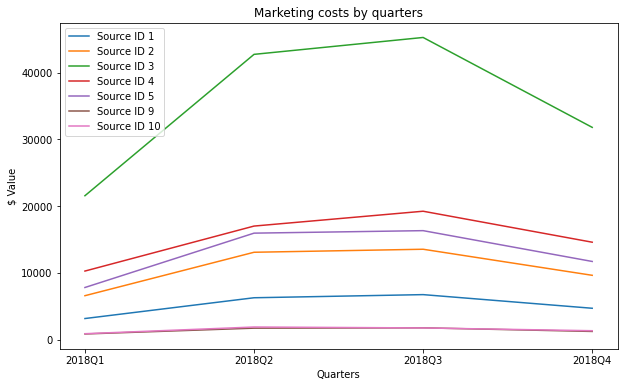

In [42]:
quarters = source_costs.columns.astype(str)
source_ids = source_costs.index
plt.figure(figsize=(10, 6))
for source_id in source_ids:
    costs = source_costs.loc[source_id].values
    plt.plot(quarters, costs, label=f'Source ID {source_id}')

plt.xlabel('Quarters')
plt.ylabel('$ Value')
plt.title('Marketing costs by quarters')
plt.legend()
plt.show()

In [43]:
correlated_logs['quarter'] = correlated_logs['buy_ts'].dt.to_period('Q-MAY')
source_uid_count = pd.pivot_table(correlated_logs,
    values='uid',
    index='source_id',
    columns='quarter',
    aggfunc=pd.Series.nunique)
source_uid_count = source_uid_count.fillna(0)

source_uid_count

quarter,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1
source_id,,,,,
1,559.0,1144.0,1140.0,900.0,0.0
2,681.0,1325.0,1233.0,1084.0,0.0
3,1307.0,2710.0,2961.0,2160.0,0.0
4,1234.0,2814.0,3330.0,2444.0,1.0
5,1102.0,2170.0,2058.0,1509.0,0.0
7,1.0,0.0,0.0,0.0,0.0
9,262.0,467.0,393.0,293.0,0.0
10,170.0,372.0,292.0,407.0,0.0


In [44]:
correlated_logs[correlated_logs['buy_ts'] > '2018-06-01']

,buy_ts,revenue,uid,device,end_ts,source_id,start_ts,session_duration_secs,time_between_access_and_purchase,buy_category,quarter
36522,2018-06-01 00:02:00,3.42,83872787173869366,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,300,180.0,1h,2019Q1


Temos uma venda referente ao mês 06 do ano 2018 pois o usuário acessou o serviço quase 00h e efetuou a compra em 3 minutos. Por isso essa compra foi computada em Junho de 2018. Como tivemos somente um caso desse acontecimento, vou excluir essa compra da nossa análise pois ela pode ser analisada no próximo ano fiscal.

Além disso, no Q1 temos uma compra referente à fonte de marketing 7. Mas quando olhamos nos gastos com anúncios, vemos que não tivemos investimento nessa fonte. Então provavelmente é um acesso de uma fonte antiga. Vou olhar a data e remove-la do dataframe também.

In [45]:
correlated_logs[correlated_logs['source_id'] == 7]

,buy_ts,revenue,uid,device,end_ts,source_id,start_ts,session_duration_secs,time_between_access_and_purchase,buy_category,quarter
4529,2017-08-17 11:20:00,1.22,11377414203346034748,desktop,2017-08-17 11:56:00,7,2017-08-17 10:28:00,5280,3120.0,1h,2018Q1


A data é do mês de agosto, então não é referente ao ano fiscal anterior. Mas de qualquer modo, não é uma fonte relevante pra nossa análise.

In [46]:
correlated_logs = correlated_logs.drop(correlated_logs[correlated_logs['buy_ts'] > '2018-06-01'].index)
correlated_logs = correlated_logs.drop(correlated_logs[correlated_logs['source_id'] == 7].index)

source_uid_count = pd.pivot_table(correlated_logs,
    values='uid',
    index='source_id',
    columns='quarter',
    aggfunc=pd.Series.nunique)
source_uid_count = source_uid_count.fillna(0)

source_uid_count

quarter,2018Q1,2018Q2,2018Q3,2018Q4
source_id,,,,
1,559,1144,1140,900
2,681,1325,1233,1084
3,1307,2710,2961,2160
4,1234,2814,3330,2444
5,1102,2170,2058,1509
9,262,467,393,293
10,170,372,292,407


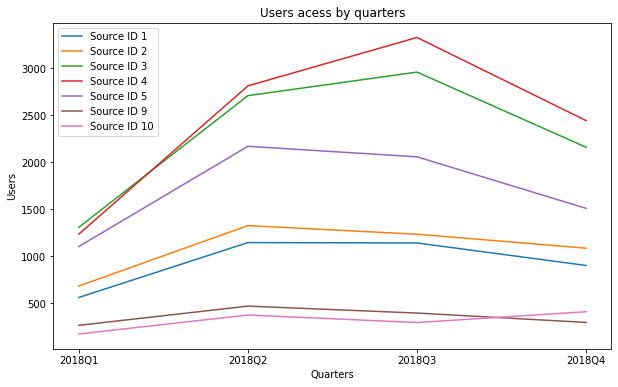

In [47]:
quarters = source_uid_count.columns.astype(str)
source_ids = source_uid_count.index
plt.figure(figsize=(10, 6))
for source_id in source_ids:
    uid = source_uid_count.loc[source_id].values
    plt.plot(quarters, uid, label=f'Source ID {source_id}')
plt.xlabel('Quarters')
plt.ylabel('Users')
plt.title('Users acess by quarters')
plt.legend()

plt.show()


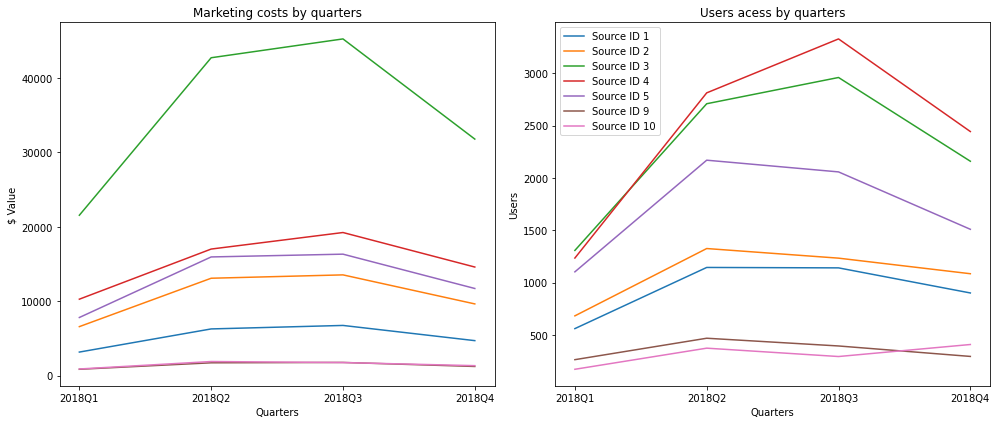

In [48]:
quarters = source_costs.columns.astype(str)
source_ids = source_costs.index
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(quarters, source_costs.T, label=f'Source ID {source_id}')
plt.xlabel('Quarters')
plt.ylabel('$ Value')
plt.title('Marketing costs by quarters')
plt.subplot(1, 2, 2)

for i, source_id in enumerate(source_uid_count.index):
    plt.plot(quarters, source_uid_count.loc[source_id], label=f'Source ID {source_id}')
plt.ylabel('Users')
plt.xlabel('Quarters')
plt.title('Users acess by quarters')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Comparando visualmente os gráficos de custos por anúncio com o gráfico de acessos únicos por anúncios vemos que nem todos anúncios são tão eficientes quanto ouros.
O anúncio 3 por exemplo é o mais caro, mas não é o que traz mais clientes. Já o anúncio 3 é o que apresenta maior taxa de conversão, e custa muito menos que o anúncio mais caro.

Com essa análise a equipe de marketing pode reduzir os gastos com o anúncio 3.

Agora vou calcular o LTV por quartis e depois o CAC, que é o custo de aquisição de cliente.

In [49]:
correlated_logs['quarter_revenue'] = correlated_logs['buy_ts'].dt.to_period('Q-MAY')
quarter_revenue = correlated_logs.groupby(['source_id', 'quarter_revenue'])['revenue'].sum().reset_index()
revenue_pivot = pd.pivot_table(quarter_revenue, values='revenue', index='source_id', columns='quarter_revenue', aggfunc='sum')
revenue_pivot



quarter_revenue,2018Q1,2018Q2,2018Q3,2018Q4
source_id,,,,
1,2882.98,5105.68,4407.71,3783.89
2,3376.51,6184.34,5869.82,5588.70
3,5946.48,11259.69,11064.86,8304.41
4,5584.76,11611.24,12349.52,10619.50
5,4961.91,9714.48,8354.98,5976.72
9,1045.40,1671.12,1244.33,841.15
10,443.98,1026.96,830.96,1163.95


In [50]:
revenue_pivot_div = revenue_pivot.div(source_uid_count, axis=0)
ltv_quarters = pd.DataFrame(revenue_pivot_div, columns=revenue_pivot.columns)
ltv_quarters



quarter_revenue,2018Q1,2018Q2,2018Q3,2018Q4
source_id,,,,
1,5.157388,4.463007,3.866412,4.204322
2,4.958164,4.667426,4.760600,5.155627
3,4.549717,4.154867,3.736866,3.844634
4,4.525737,4.126240,3.708565,4.345131
5,4.502641,4.476719,4.059757,3.960716
9,3.990076,3.578415,3.166234,2.870819
10,2.611647,2.760645,2.845753,2.859828


Esse é o LTV (Lifetime Value) de todos os clientes divididos por trimestres.
Agora vou calcular o CAC.

In [51]:
source_costs_div = source_costs.div(source_uid_count, axis = 0)
cac_quarters = pd.DataFrame(source_costs_div, columns = source_costs.columns)
cac_quarters

quarter,2018Q1,2018Q2,2018Q3,2018Q4
source_id,,,,
1,5.635599,5.474580,5.905140,5.209100
2,9.649838,9.870445,10.973139,8.880332
3,16.487804,15.766100,15.284316,14.717167
4,8.315956,6.041905,5.773339,5.967500
5,7.077623,7.346488,7.927770,7.753698
9,3.193473,3.657837,4.469822,4.150000
10,5.156529,5.054489,5.962637,3.254349


Encontramos então o custo de aquisição de clientes pra cada trimestre.

Vamos colocar em um gráficos para melhor visualização.

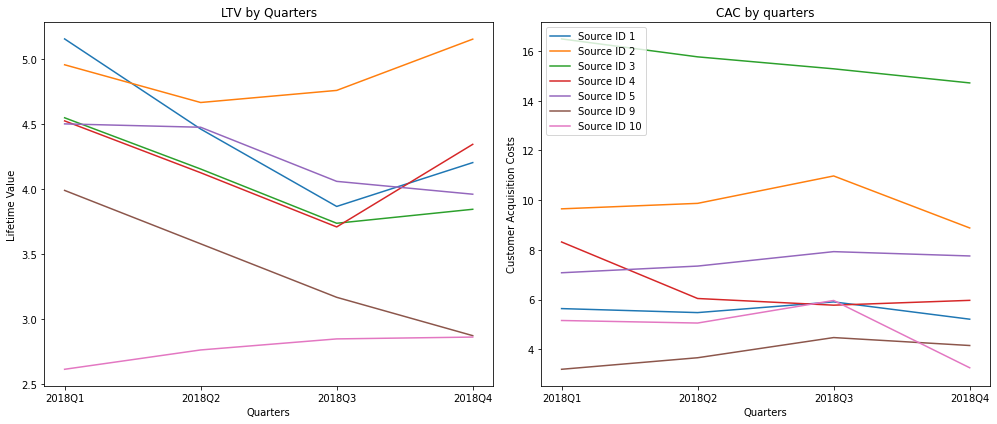

In [52]:
quarters = ltv_quarters.columns.astype(str)
source_ids = ltv_quarters.index
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(quarters, ltv_quarters.T, label=f'Source ID {source_id}')
plt.xlabel('Quarters')
plt.ylabel('Lifetime Value')
plt.title('LTV by Quarters')

plt.subplot(1, 2, 2)
for i, source_id in enumerate(cac_quarters.index):
    plt.plot(quarters, cac_quarters.loc[source_id], label=f'Source ID {source_id}')
plt.ylabel('Customer Acquisition Costs')
plt.xlabel('Quarters')
plt.title('CAC by quarters')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Visualmente podemos ver que o custo de aquisição por cliente da fonte 3 é muito maior do que das outras, que já tinhamos discutido anteriormente. 
Ao longo do tempo podemos visualizar que a fonte 9 não mantém novos clientes, enquanto outras oscilam com o tempo. 
A fonte de anúncios 2 é uma das mais vantajosas, pois se mantém alta em todo ano fiscal, com apenas um leve aumento no custo de aquisição.

# 3.1.3.3 Retorno dos Investimentos

Calculando o Retorno dos Investimentos iremos verificar se os gastos com marketing estão sendo rentáveis. Para isso, vamos realizar a divisão do LTV pelo CAC.

In [53]:
ltv_cac_div = ltv_quarters.div(cac_quarters,axis = 0)
romi_quarters = pd.DataFrame(ltv_cac_div, columns = ltv_quarters.columns)
romi_quarters

romi_quarters.cumsum(axis=1).round(2) 



quarter_revenue,2018Q1,2018Q2,2018Q3,2018Q4
source_id,,,,
1,0.92,1.73,2.39,3.19
2,0.51,0.99,1.42,2.00
3,0.28,0.54,0.78,1.05
4,0.54,1.23,1.87,2.60
5,0.64,1.25,1.76,2.27
9,1.25,2.23,2.94,3.63
10,0.51,1.05,1.53,2.41


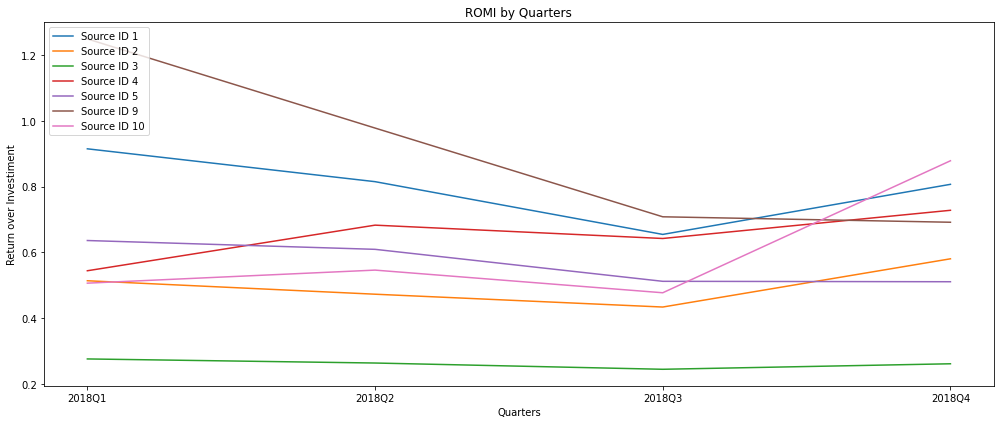

In [54]:
quarters = romi_quarters.columns.astype(str)
source_ids = romi_quarters.index
plt.figure(figsize=(14, 6))

for i, source_id in enumerate(romi_quarters.index):
    plt.plot(quarters, romi_quarters.loc[source_id], label=f'Source ID {source_id}')
plt.xlabel('Quarters')
plt.ylabel('Return over Investiment')
plt.title('ROMI by Quarters')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Essa é a tabela pivot de Retorno dos investimentos e o gráfico por trimestre. Quando avaliamos o gráfico, vemos que por mês os anúncios não se pagam tanto, mas quando efetuamos a soma com o intervalo anterior, encontramos o lucro. No geral, todas pagaram seu investimento ao fim do ano fiscal, porém algumas foram muito mais rentáveis do que outras. 

    - As fontes 1 e 9 foram as mais rentáveis no fim do ano, tendo triplicado o seu retorno final.
    - A fonte 3 quase não se pagou, alcançando praticamente o mesmo que teve de despesa no fim do ano.
    - As outras fontes mantiveram uma boa estabilidade se pagando no segundo ou no terceiro trimestre.

# 4.1 Conclusão

As finanças estão indo bem no geral, pois todos anúncios se pagaram e não tivemos prejuízo no decorrer do ano. Porém algumas melhorias podem ser feitas.

Ao longo do ano a média dos clientes que fazem mais de uma compra é muito relevante pra receita final. Uma parcela de 30% são clientes que compraram mais de uma vez e a soma das vendas para esses clientes é muito próxima da receita total dos clientes que compraram uma única vez.
Uma estratégia de marketing voltada para esses clientes seria muito interessante, como algum tipo de promoção ou combo.

Com relação aos anúncios para trazer clientes novos existem alguns problemas que merecem atenção.
Mesmo todos anúncios se pagando ao longo do ano, o anúncio 3 custou muito caro e retornou muito pouco. Não é vantajoso o tamanho do investimento feito nele, quando existem outros anúncios, como o 1 e o 9 que trazem um retorno do investimento muito mais alto.
Além desse retorno de investimento diretamente, o anúncio 4 traz uma quantia bruta de clientes muito significativa também. Por mais que o retorno dele não seja tão visível, a aquisição de grandes clientes em números absolutos também é uma métrica relevante pro negócio.

Grande parte dos clientes realizam a compra na primeira hora ou no máximo no primeiro dia, então algum tipo de promoção imediatamente pós-registro também poderia ser viável pra aumentar esses clientes imediatos.

Com relação a taxa de retenção, encontramos uma taxa de retenção de 15% semanal e 4% mensal. Não é uma taxa alta, 